In [81]:
import pandas as pd
import numpy as np
import math
import statistics
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
data_to_load = 'belize_airbnb_listings.csv'


In [83]:
belize_df = pd.read_csv(data_to_load)
belize_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,36666,Mo's Cozy Casa w/ veranda & access to dock,157752,Monique,Belize,Belize Islands,17.74786,-88.02398,Entire home/apt,141,3,250,2/23/2021,2.00,5,225
1,36690,Mo's Cozy Cabana w/ comfy veranda & access to ...,157752,Monique,Belize,Belize Islands,17.74832,-88.02474,Entire home/apt,71,3,316,2/19/2021,2.46,5,164
2,108932,Purple House eco solar w/ ocean & wildlife views,563377,Michael,Belize,Belize Islands,17.73221,-88.03824,Entire home/apt,191,2,30,3/14/2020,0.78,1,364
3,110483,Michelo's fuchsia suite,567809,Michel,Stann Creek,Stann Creek Mainland,16.52114,-88.36926,Hotel room,121,1,27,2/24/2020,0.29,3,331
4,120115,Seaside Villas Second Floor Unit #4,604999,Bobbi,Belize,Belize Islands,17.74166,-88.02395,Entire home/apt,343,1,30,3/18/2020,0.64,22,203


# Week 9 Homework

### Question 1
1.	Create two histograms in a subplot (vertical or horizontal is fine) that show the distribution of reviews_per_month and number_of_reviews in Belize Airbnb data 

a.	How do you choose your bin size?

For both plots I let the bins auto select first to see what they looked like. I decided to reduce the number of bins for both plots because both histograms are right skewed and there appear to be a number of outliers. With more bins you can barely see that anything is there, so reducing it to fewer bins, 50 and 30 respectively gives you a better idea of how many are in each bin. However, reducing it to too few bins makes it harder to distinguish between bins.

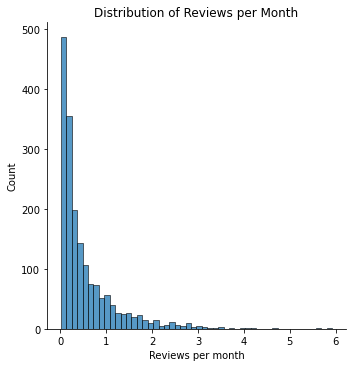

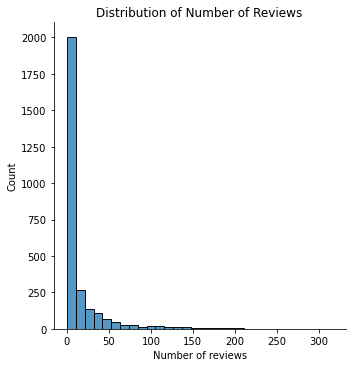

In [84]:
sns.displot(data = 'belize_df', x= belize_df['reviews_per_month'], bins = 50)
plt.title('Distribution of Reviews per Month')
plt.xlabel('Reviews per month')
plt.show()

sns.displot(data = 'belize_df', x= belize_df['number_of_reviews'], bins = 30)
plt.title('Distribution of Number of Reviews')
plt.xlabel('Number of reviews')
plt.show()

### Question 2
2.	Create a box and whisker plot for availability_365. What does this show you?!
* There are a few outlier availabilities that are about 10 or fewer days.
* The median number of days available is close to 350.
* If you calculated the mean it would not be a good indicator of central tendency because so much of the data is concentrated between ~210 -365 days this is the interquartile range (between 25% and 75% of the data).

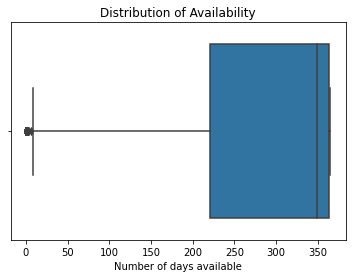

In [85]:
availability = sns.boxplot(x= belize_df['availability_365'])
plt.title('Distribution of Availability')
plt.xlabel('Number of days available')
plt.show()

### Question 3
What is the probability that the price for an Airbnb is under $50. 

1.75%

a.	What do you notice about these records? Hint: look at the other columns.

These records seem to be primarily for private or shared rooms inside a larger space. Or a cabin.
Also the prices seem to be between 20-30 or 35-50.

b.	What distribution does this data most closely fit?

It most closely fits a binomial distribution.

In [92]:
under_50 = belize_df[belize_df['price'] < 50]
# get probability of each price under 50
fifty = len(under_50)
total = len(belize_df)
probability = fifty/total
print(probability * 100)
under_50



1.7525035765379111


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
134,4005831,"Home away from home, Shared dormitory, NO AC",9315171,Julia,Belize,Belize Mainland,17.51482,-88.22233,Private room,20,1,2,3/1/2020,0.03,10,365
148,4304743,"DORMITORY Bed #1 of 6, on Maya Ruin",2084006,Lower Dover,Cayo,Cayo,17.21379,-88.94974,Shared room,36,1,1,2/10/2020,0.08,4,365
172,4936432,"Home away from home, Shared dormitory, NO AC",9315171,Julia,Belize,Belize Mainland,17.51426,-88.22121,Shared room,20,1,16,2/4/2020,0.24,10,365
189,5509363,"Yaxche Jungle Camp, Dormitory",6960726,Yaxche Jungle Camp,Cayo,Cayo,17.15125,-88.66244,Shared room,24,1,30,2/25/2020,0.42,2,365
196,5717367,Comfortable and Ecological Camping,29641332,Minerva,Cayo,Cayo,17.05410,-89.11378,Entire home/apt,30,1,6,10/16/2017,0.09,1,365
315,10004488,Long Term Stay in the country,48785884,Barbara And Bart,Orange Walk,Orange Walk,18.08422,-88.54060,Entire home/apt,22,28,0,NaN,NaN,2,115
341,10857678,Gecko Cabin,52665457,Vanessa,Stann Creek,Stann Creek Mainland,17.03210,-88.51931,Private room,28,7,1,3/5/2020,0.08,9,218
343,11010397,Tree Frog Cabin,52665457,Vanessa,Stann Creek,Stann Creek Mainland,17.03278,-88.51718,Private room,28,7,2,4/23/2019,0.08,9,218
344,11015225,Fern Cabin,52665457,Vanessa,Stann Creek,Stann Creek Mainland,17.03380,-88.51922,Private room,28,7,7,2/15/2020,0.19,9,218
346,11057764,Jacamar Cabin,52665457,Vanessa,Stann Creek,Stann Creek Mainland,17.03246,-88.51903,Private room,28,7,3,12/24/2019,0.08,9,218


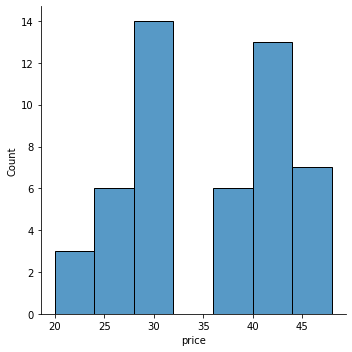

In [87]:
sns.displot(data = 'under_50', x= under_50['price'])
plt.show()

### Question 4
4.	Calculate the sample variance and standard deviation for all the numerical columns in the same output. 
a.	Why sample variance and not population variance?

We want sample variance because we don't know for sure that this sample is fully representative of the population. Our sample may not be large enough for that.

b.	What is your takeaway for each metric?

This is not useful information for ID, or host_ID because these are just assigned values they don't mean anything in terms of variability.
It's not very useful for latitude and longitude because the entire dataset is for airbnb rentals in Belize so you wouldn't expect too much variation.
We can tell that there is a very wide range of prices, a fairly wide range of minimum nights and 'number_of_reviews', very little variance in 'reviews_per_month, and a wide range of 'calculated_host_listings_count'.

c.	What are the scales of measurement for each of these values? 

ID: ordinal

host_id: ordinal

latitude: interval

longitude: interval

availability_365: ratio

price: ratio

minimum_nights: ratio

number_of_reviews: ratio

reviews_per_month: ordinal

calculated_host_listings_count: ordinal

In [88]:
belize_df[['id', 'host_id', 'latitude', 'longitude', 'availability_365', 'price', 'minimum_nights',
           'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count']].agg([np.var, np.std])
# tried with and without inclduing ddof=1 and it gave me the sample variance for both

,id,host_id,latitude,longitude,availability_365,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count
var,1.661428e+14,1.036327e+16,0.288841,0.147361,14548.613157,317109.568066,32.147122,919.773508,0.438448,2674.046405
std,1.288964e+07,1.018001e+08,0.537440,0.383876,120.617632,563.124825,5.669843,30.327768,0.662154,51.711183


### Question 5
What percent of Airbnb listings in Belize are available 360 days a year or more? 

39.5%

a.	360 days or less? 

61.6%

b.	What distribution does this data most closely fit?

A log-normal distribution.

In [102]:
over_360 = belize_df[belize_df['availability_365'] >= 360]
# get probability of each price under 50
three_sixty = len(over_360)
total = len(belize_df)
probability = three_sixty/total
print(probability * 100)

under_360 = belize_df[belize_df['availability_365'] <= 360]
# get probability of each price under 50
u_three_sixty = len(under_360)
total = len(belize_df)
probability = u_three_sixty/total
print(probability * 100)


39.52074391988555
61.55221745350501


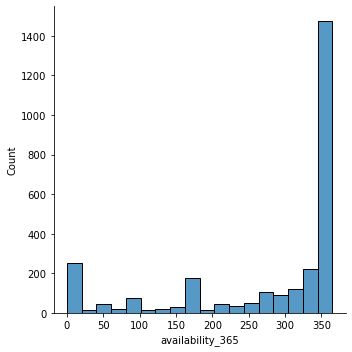

In [90]:
sns.displot(data = 'belize_df', x= belize_df['availability_365'])
plt.show()

### Question 6
What minimum night count are 75% of Airnbnb listing in Belize greater than?

One night because the first quartile is one night.

In [91]:
belize_df['minimum_nights'].describe()

count    2796.000000
mean        2.263948
std         5.669843
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max       180.000000
Name: minimum_nights, dtype: float64